# **11. Visualizing Time Series Data in Python**

## Chapter 1 - Line Plots


You will learn how to leverage basic plottings tools in Python, and how to annotate and personalize your time series plots. By the end of this chapter, you will be able to take any static dataset and produce compelling plots of your data.

**Load your time series data**

The most common way to import time series data in Python is by using the pandas library. You can use the read_csv() from pandas to read the contents of a file into a DataFrame. This can be achieved using the following command:

In [1]:
# Import pandas
import pandas as pd

In [2]:
discoveries = pd.read_csv('ch1_discoveries.csv')
discoveries.head(5)

date  Y
0  1860-01-1  5
1  1861-01-1  3
2  1862-01-1  0
3  1863-01-1  2
4  1864-01-1  0

**Test whether your data is of the correct type**

When working with time series data in pandas, any date information should be formatted as a datetime64 type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the .dtypes attribute. Fortunately, if your date columns come as strings, epochs, etc… you can use the to_datetime() function to convert them to the appropriate datetime64 type:

In [3]:
print(discoveries.dtypes)


date    object
Y        int64
dtype: object


In [4]:
# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

In [5]:
print(discoveries.dtypes)


date    datetime64[ns]
Y                int64
dtype: object


**Your first plot!**

Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.

matplotlib is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the pandas library has implemented a .plot() method on Series and DataFrame objects that is a wrapper around matplotlib.pyplot.plot(), which makes it easier to produce plots.

        date  Y
0 1860-01-01  5
1 1861-01-01  3


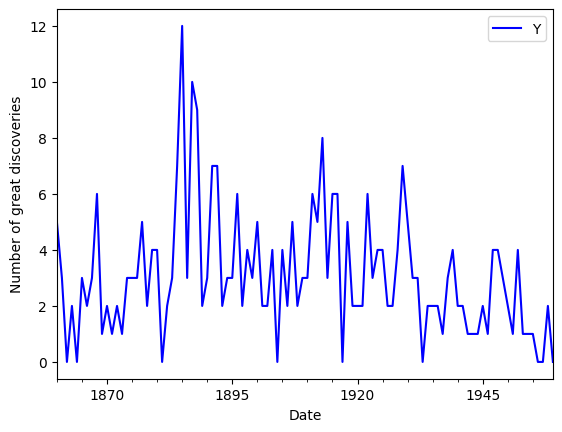

In [6]:
import matplotlib.pyplot as plt

print(discoveries.head(2))
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show();

**Specify plot styles**

The matplotlib library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command plt.style.use(your_stylesheet) where your_stylesheet is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command print(plt.style.available). For the rest of this course, we will use the awesome fivethirtyeight style sheet.

    Import matplotlib.pyplot using its usual alias plt.
    Use the fivethirtyeight style sheet to plot a line plot of the discoveries data.

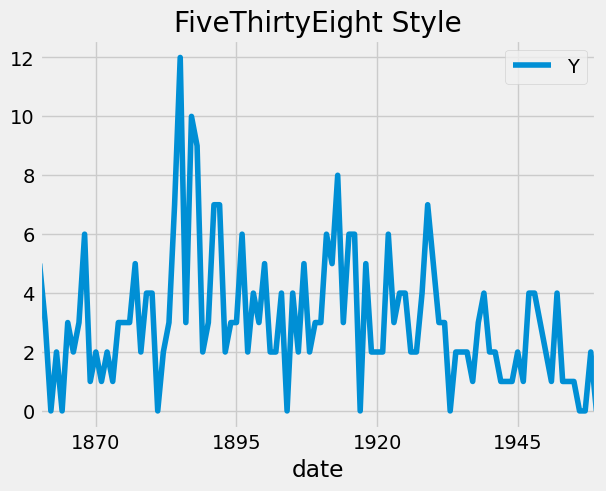

In [7]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()


    Use the ggplot style sheet to plot a line plot of the discoveries data.
    Set the title of your second plot as 'ggplot Style'.

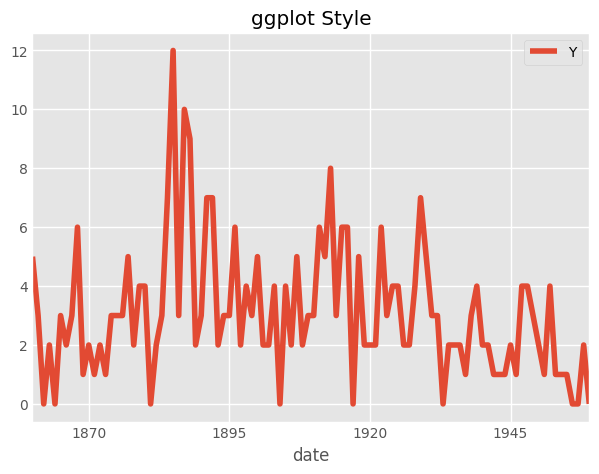

In [8]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

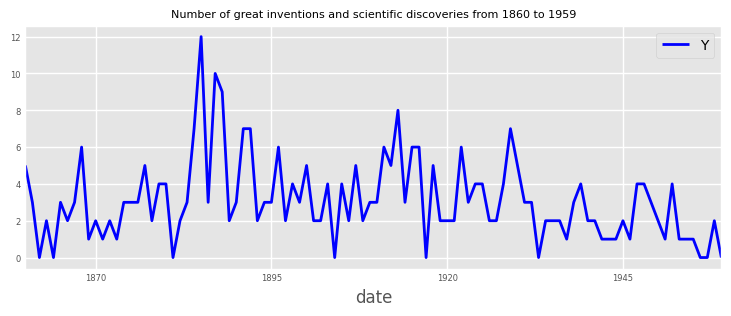

In [9]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

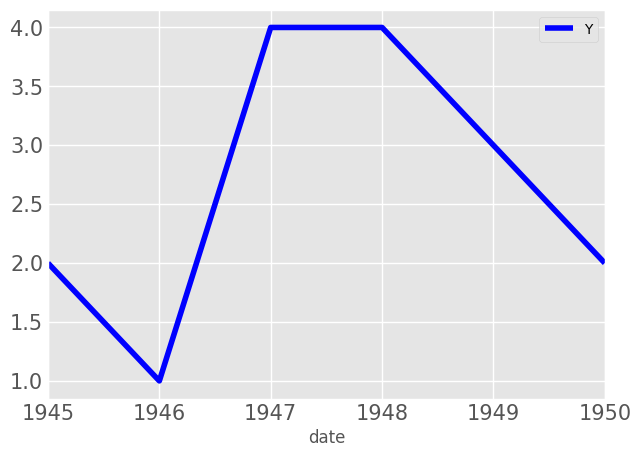

In [10]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show();

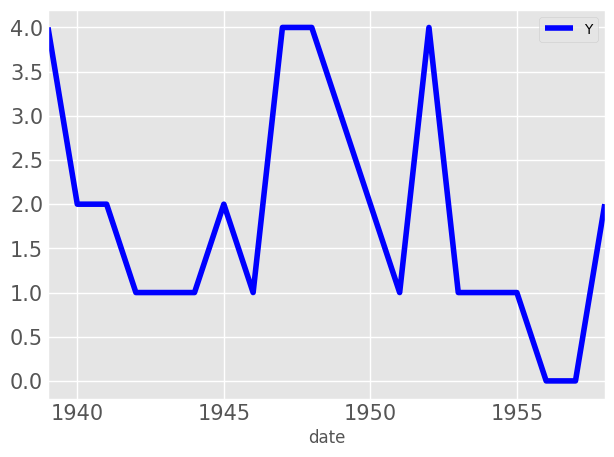

In [11]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show();

**Add vertical and horizontal markers**

Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command: ax.axvline('1945-01-01', linestyle='--').

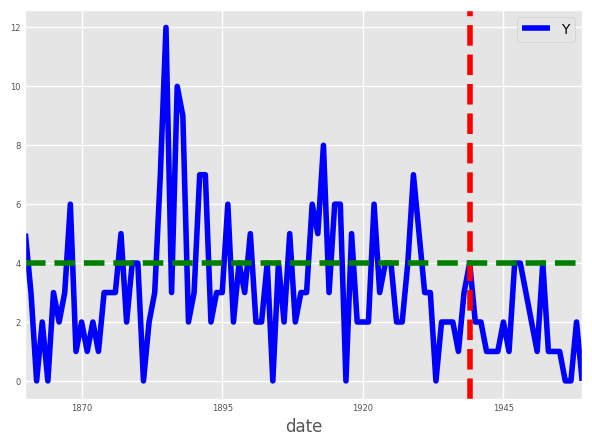

In [12]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show();


**Add shaded regions to your plot**

When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command: ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5).

Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

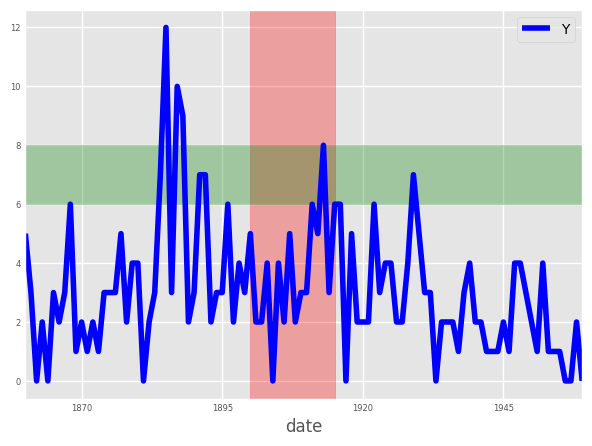

In [13]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show();

## Chapter 2 - Summary Statistics and Diagnostics


In [14]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

**Find missing values**

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called df that contains time series data, you can use the command:

    missing_values = df.isnull().sum().

In [15]:
# Read in the file content in a DataFrame called co2_levels
co2_levels = pd.read_csv('ch2_co2_levels.csv', parse_dates=['datestamp'])

# Display the first seven lines of the DataFrame
print(co2_levels.head(7))

   datestamp    co2
0 1958-03-29  316.1
1 1958-04-05  317.3
2 1958-04-12  317.6
3 1958-04-19  317.5
4 1958-04-26  316.4
5 1958-05-03  316.9
6 1958-05-10    NaN


In [16]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


**Handle missing values**

In order to replace missing values in your time series data, you can use the command:


    df = df.fillna(method="ffill")

where the argument specifies the type of method you want to use. For example, specifying **bfill** (i.e backfilling) will ensure that missing values are replaced using the next valid observation, while **ffill** (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

Recall from the previous exercise that co2_levels has 59 missing values.

In [17]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


C:\Users\yeiso\AppData\Local\Temp\ipykernel_18764\2624947007.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  co2_levels = co2_levels.fillna(method='bfill')


**Display rolling averages (aggregating data)**

It is also possible to visualize rolling averages of the values in your time series. This is equivalent to "smoothing" your data, and can be particularly useful when your time series contains a lot of noise or outliers. For a given DataFrame df, you can obtain the rolling average of the time series by using the command: df_mean = df.rolling(window=12).mean().

The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365. In addition, it is easy to get rolling values for other other metrics, such as the standard deviation (.std()) or variance (.var()).

In [18]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()
ma

co2
datestamp             
1958-03-29         NaN
1958-04-05         NaN
1958-04-12         NaN
1958-04-19         NaN
1958-04-26         NaN
...                ...
2001-12-01  370.738462
2001-12-08  370.761538
2001-12-15  370.798077
2001-12-22  370.832692
2001-12-29  370.865385

[2284 rows x 1 columns]

In [19]:
# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()
mstd

co2
datestamp           
1958-03-29       NaN
1958-04-05       NaN
1958-04-12       NaN
1958-04-19       NaN
1958-04-26       NaN
...              ...
2001-12-01  1.932199
2001-12-08  1.925490
2001-12-15  1.915212
2001-12-22  1.907541
2001-12-29  1.904060

[2284 rows x 1 columns]

In [20]:

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

In [21]:
# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

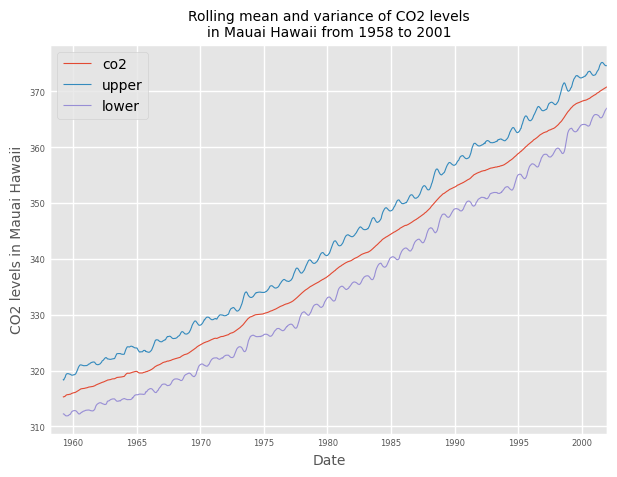

In [22]:
# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show();

**Computing aggregate values of your time series**

In [23]:
co2_levels.index


DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

In [24]:
co2_levels.index.month


Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
       ...
       10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype='int32', name='datestamp', length=2284)

In [25]:
co2_levels.index.year


Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
       ...
       2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
      dtype='int32', name='datestamp', length=2284)

**Display aggregated values**

You may sometimes be required to display your data in a more aggregated form. For example, the co2_levels data contains weekly data, but you may need to display its values aggregated by month of year. In datasets such as the co2_levels DataFrame where the index is a datetime type, you can extract the year of each dates in the index: index_year = df.index.year.

To extract the month or day of the dates in the indices of the df DataFrame, you would use df.index.month and df.index.day, respectively. You can then use the extracted year of each indices in the co2_levels DataFrame and the groupby function to compute the mean CO2 levels by year: df_by_year = df.groupby(index_year).mean().

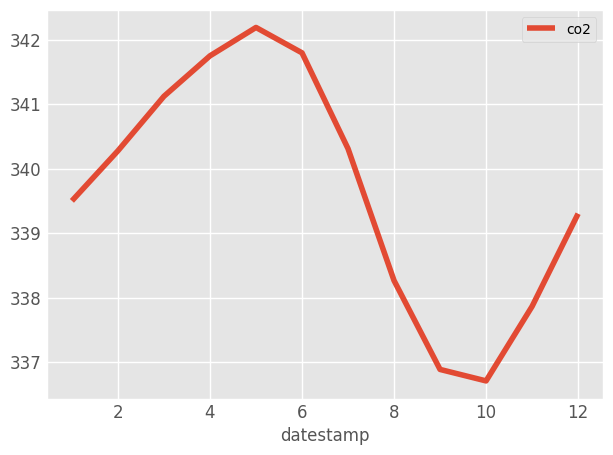

In [26]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
# Using the groupby and mean functions from the pandas library, 
#  compute the monthly mean CO2 levels in the co2_levels DataFrame 
#  and assign that to a new DataFrame called mean_co2_levels_by_month.
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=12)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show();

By plotting the mean CO2 levels data for each month, you can see how CO2 levels are high during the summer months, and lower during the winter months. This is because of the increased sunlight and CO2 production by plants!




**Compute numerical summaries**

You have learnt how to display and annotate time series data in multiple ways, but it is also informative to collect summary statistics of your data. Being able to achieve this task will allow you to share and discuss statistical properties of your data that can further support the plots you generate. In pandas, it is possible to quickly obtain summaries of columns in your DataFrame by using the command: print(df.describe()).

This will print statistics including the mean, the standard deviation, the minima and maxima and the number of observations for all numeric columns in your pandas DataFrame.

In [27]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


It looks like the CO2 levels data has an average value of 339.657750.



**Boxplots and Histograms**

Boxplots represent a graphical rendition of the minimum, median, quartiles, and maximum of your data. You can generate a boxplot by calling the .boxplot() method on a DataFrame.

Another method to produce visual summaries is by leveraging histograms, which allow you to inspect the data and uncover its underlying distribution, as well as the presence of outliers and overall spread. An example of how to generate a histogram is shown below: ax = co2_levels.plot(kind='hist', bins=100).

Here, we used the standard .plot() method but specified the kind argument to be 'hist'. In addition, we also added the bins=100 parameter, which specifies how many intervals (i.e bins) we should cut our data into.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


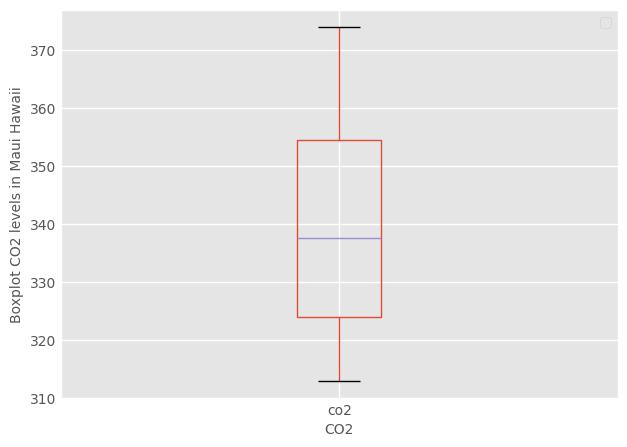

In [28]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show();

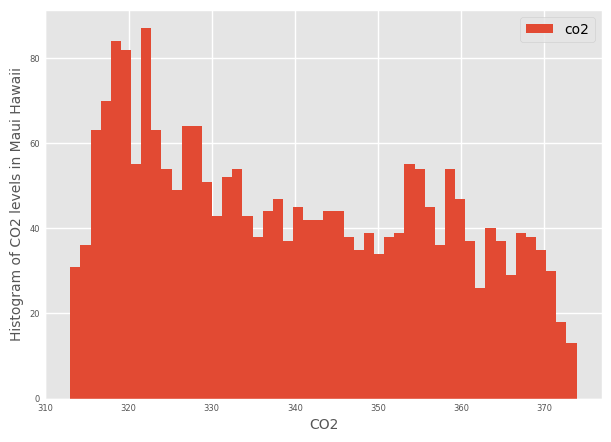

In [29]:

# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show();

**Density plots**

In practice, histograms can be a substandard method for assessing the distribution of your data because they can be strongly affected by the number of bins that have been specified. Instead, kernel density plots represent a more effective way to view the distribution of your data. An example of how to generate a density plot of is shown below: ax = df.plot(kind='density', linewidth=2).

The standard .plot() method is specified with the kind argument set to 'density'. We also specified an additional parameter linewidth, which controls the width of the line to be plotted.

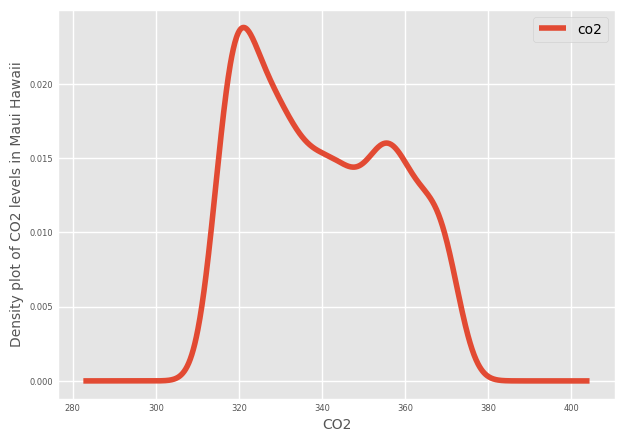

In [30]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show();

## Chapter 3 - Seasonality, Trend and Noise

Autocorrelation is measured as the correlation between a time series and a delayed copy of itself. It is used to find repeating patterns or periodic sygnals in time series data. Sometimes called autocovariance.

Seasonality: does the data display a clear periodic pattern?

Trend: does the data follow a consistent upwards or downwards slope?

Noise: are there any outlier points or missing values that are not consistent with the rest of the data?

In [31]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

**Autocorrelation in time series data**

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

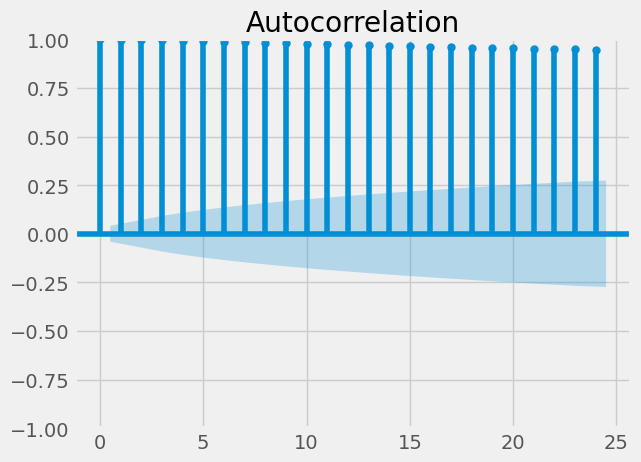

In [32]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show();

They are highly correlated and statistically significant.


**Interpret autocorrelation plots**

Interpret partial autocorrelation plots
If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In the partial autocorrelation plot above, at which lag values do we have statistically significant partial autocorrelations? 

    Answer: 0, 1, 3, 4, 5 and 6.



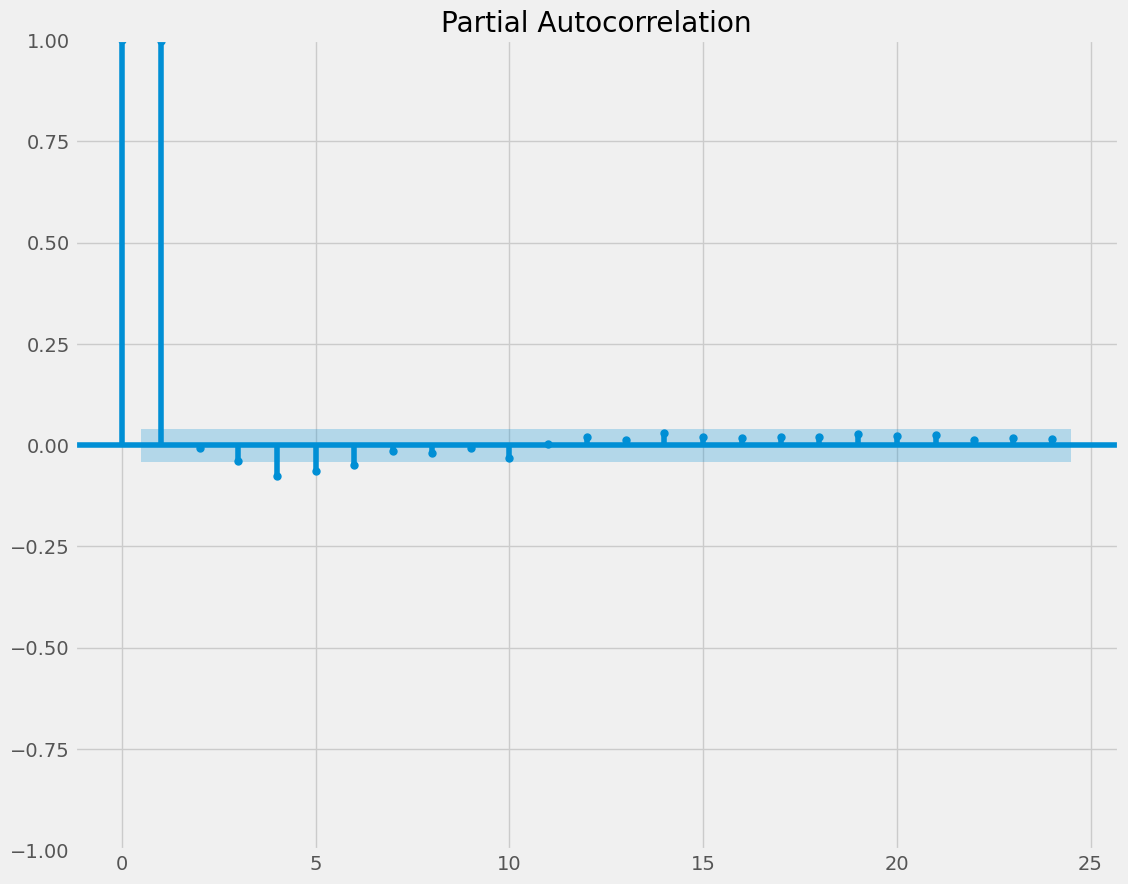

In [33]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)
fig.set_figheight(10)
fig.set_figwidth(12)

# Show plot
plt.show();

**Time series decomposition**

When visualizing time series data, you should look out for some distinguishable patterns:

seasonality: does the data display a clear periodic pattern?
trend: does the data follow a consistent upwards or downward slope?
noise: are there any outlier points or missing values that are not consistent with the rest of the data?
You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box: decomposition = sm.tsa.seasonal_decompose(time_series).

You can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

In [34]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.



**Plot individual components**

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, resid) components.


    observed = decomposition.observed
    trend = decomposition.trend 
    residuals = decomposition.resid

You can then use the extracted components and plot them individually.

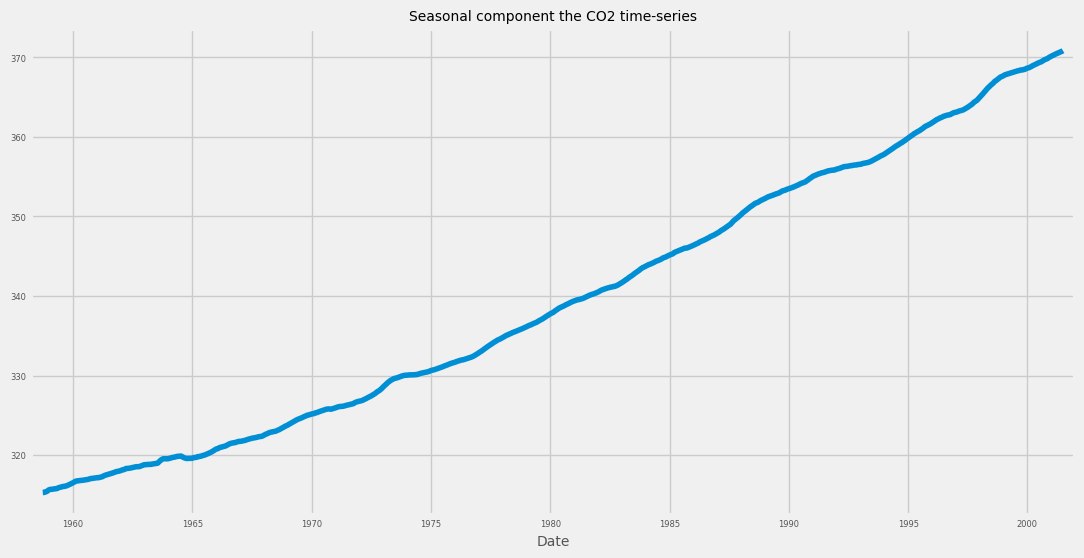

In [35]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show();

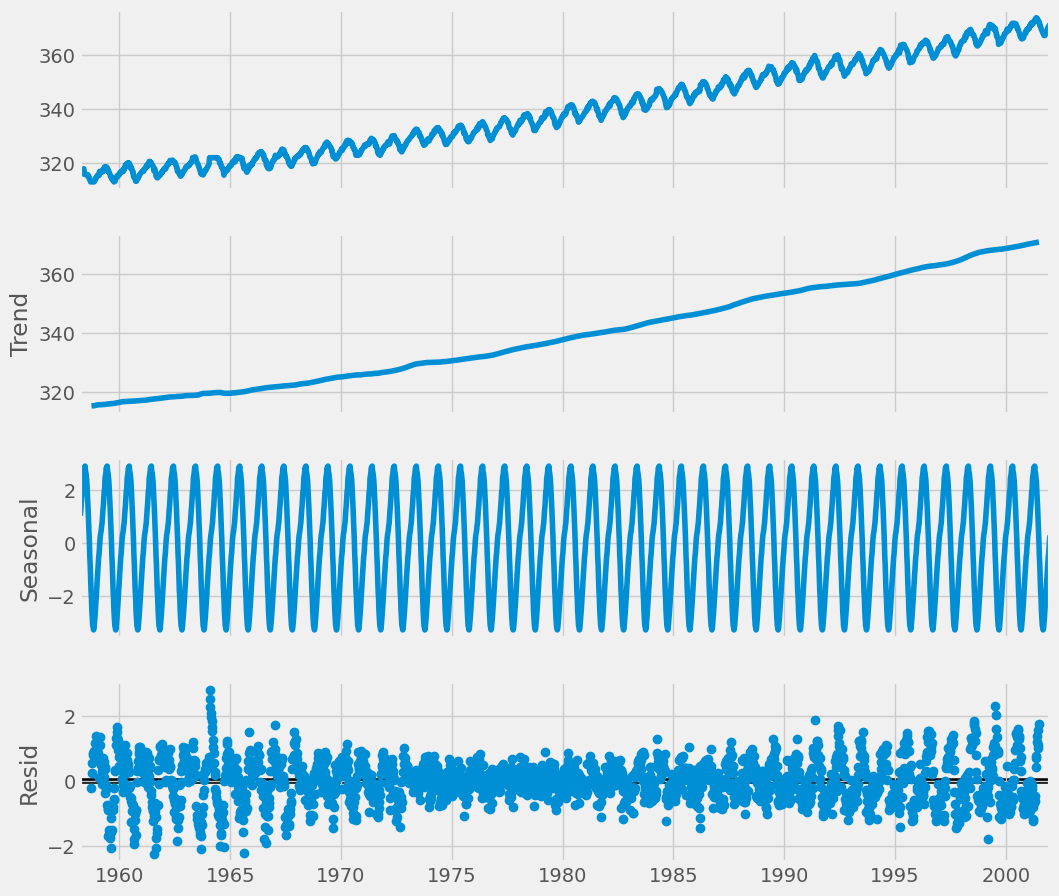

In [36]:

fig = decomposition.plot()
fig.set_figheight(10)
fig.set_figwidth(12)
plt.show();

**Visualize the airline dataset**

You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

In [37]:
import pandas as pd

# Read in the file content in a DataFrame called airline
airline = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\11. Visualizing Time Series Data in Python\\datasets\\ch3_airline_passengers.csv', parse_dates=True, index_col='Month')

# Display the first five lines of the DataFrame
print(airline.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\11. Visualizing Time Series Data in Python\\datasets\\ch3_airline_passengers.csv'

In [ ]:
print(airline.tail())


            AirPassengers
Month                    
1960-08-01            606
1960-09-01            508
1960-10-01            461
1960-11-01            390
1960-12-01            432


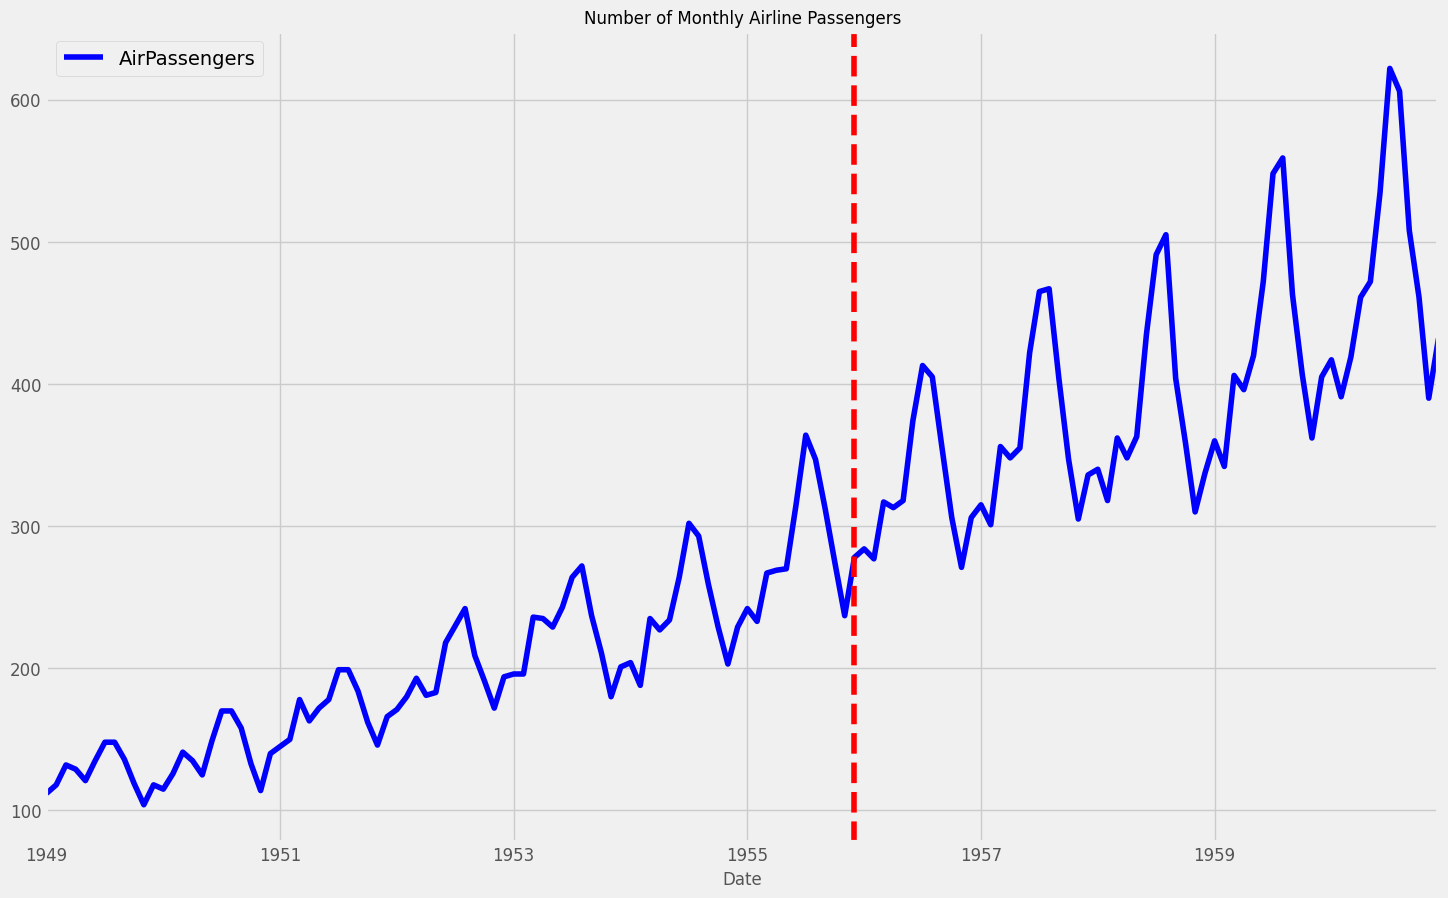

In [ ]:
plt.rcParams["figure.figsize"] = (16,10)

# Plot the time series in your dataframe
ax = airline.plot(color="blue", fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show();

*The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?*

**Analyze the airline dataset**

Check for the presence of missing values, and collect summary statistics of time series data contained in a pandas DataFrame.
Generate boxplots of your data to quickly gain insight in your data.
Display aggregate statistics of your data using groupby().

In [ ]:

# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


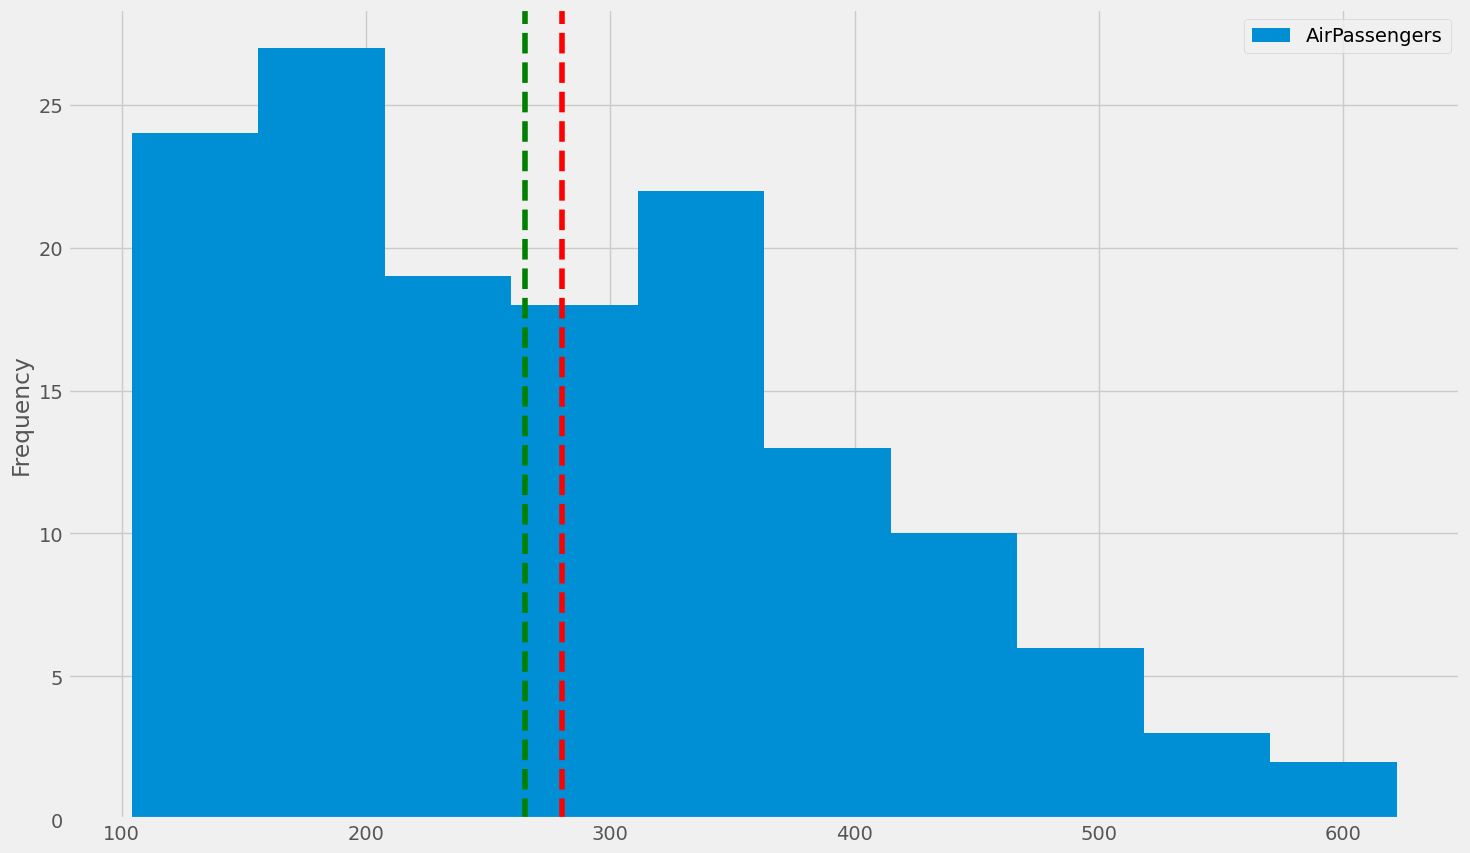

In [ ]:
ax = airline.plot(kind='hist')
# Mean
ax.axvline(280, color='red', linestyle='--', label="mean")
# Median
ax.axvline(265, color='green', linestyle='--', label="median")
plt.show();

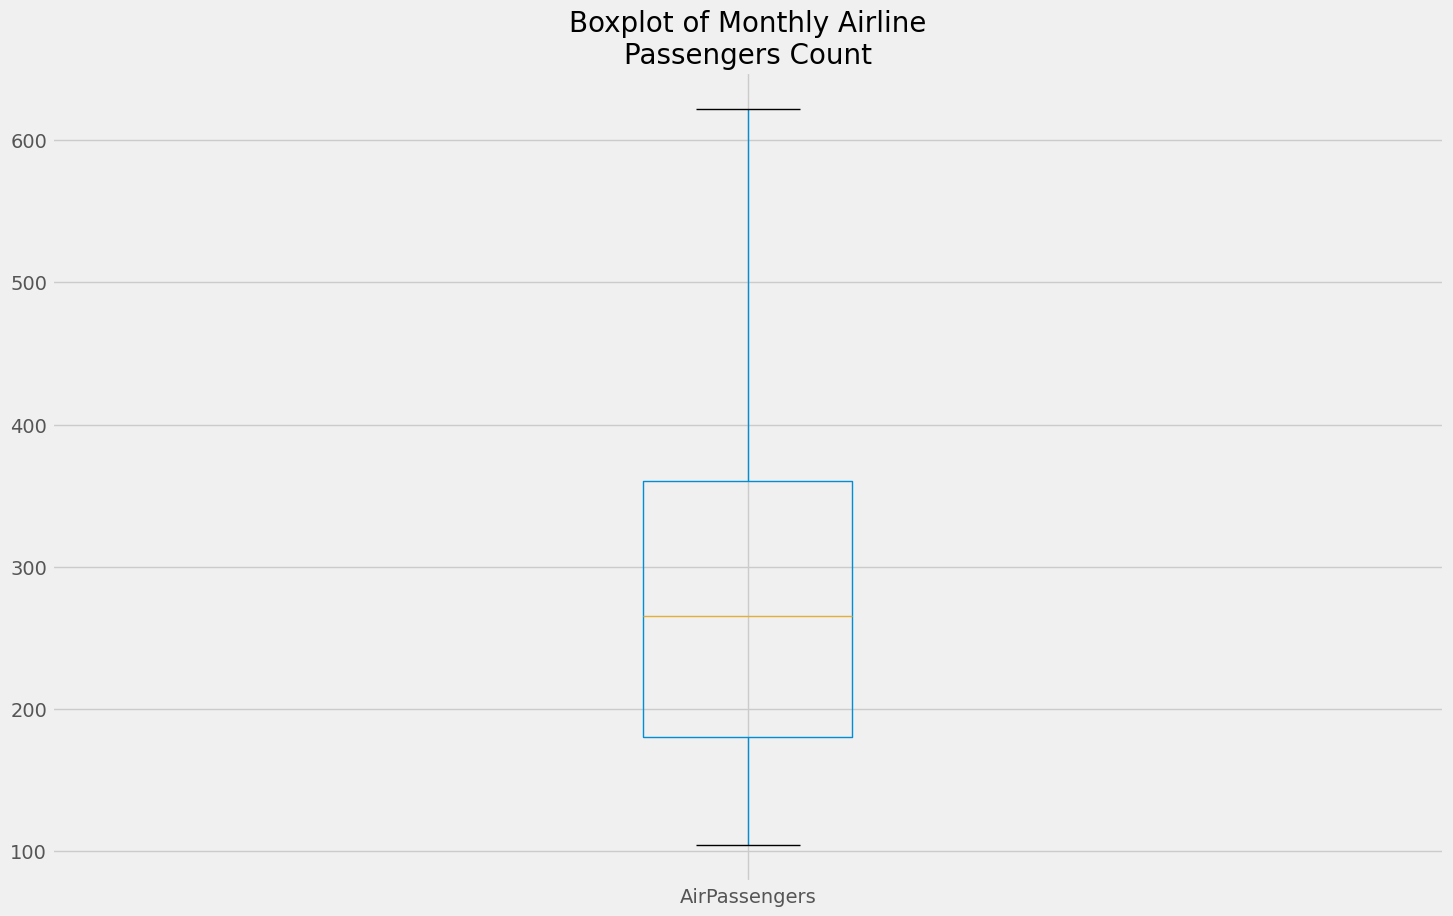

In [ ]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show();

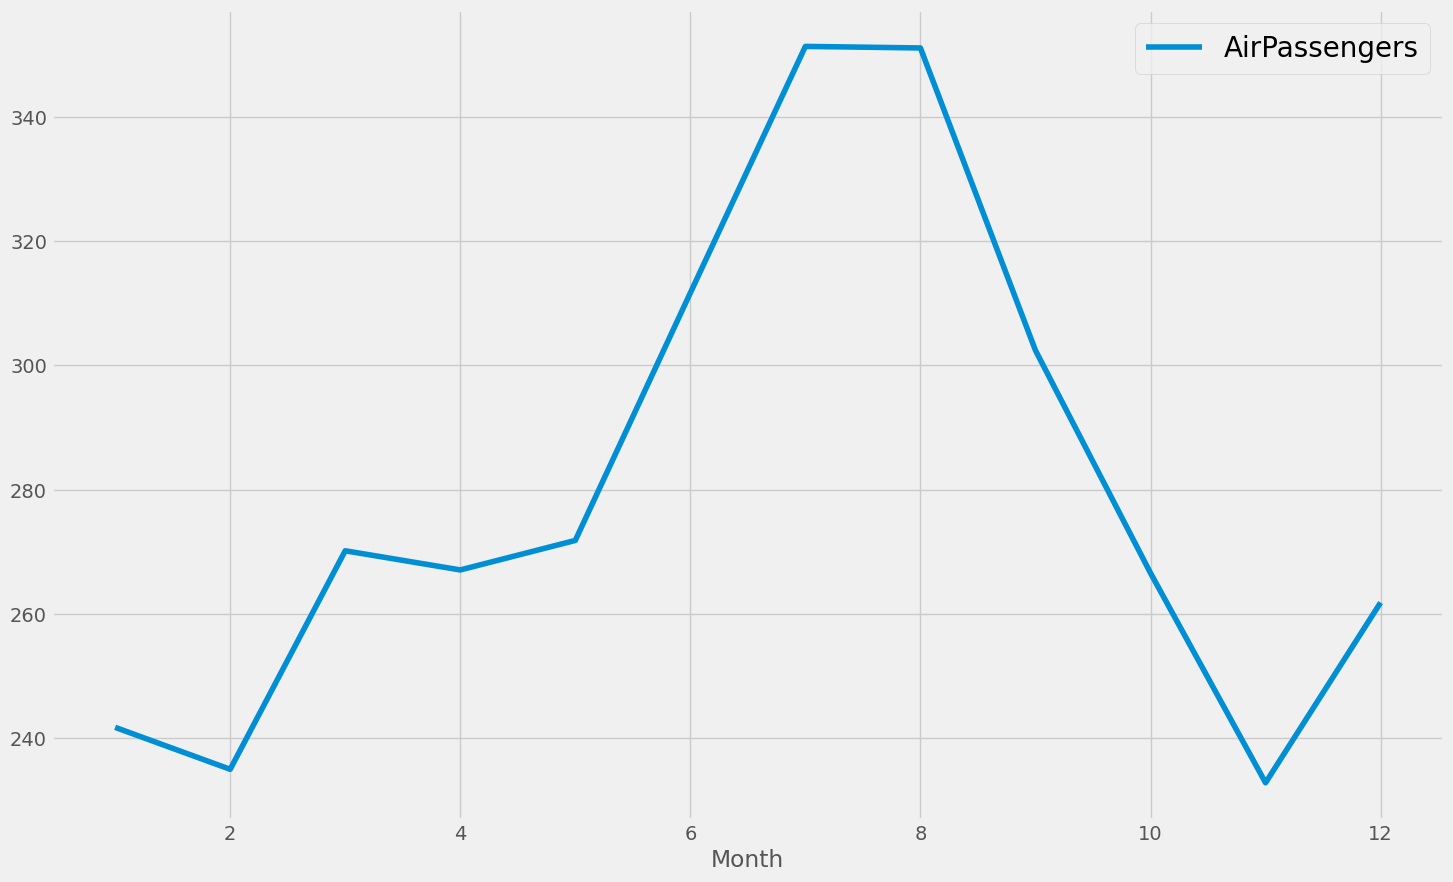

In [ ]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show();

*Looks like July and August are the busiest months!*

**Time series decomposition of the airline dataset**

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal componenets.

In [ ]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

noise = decomposition.resid

In [ ]:
airline_decomposed = airline.copy()
airline_decomposed['trend'] = trend
airline_decomposed['seasonal'] = seasonal
airline_decomposed['noise'] = noise
airline_decomposed.head()

AirPassengers  trend   seasonal  noise
Month                                             
1949-01-01            112    NaN -24.748737    NaN
1949-02-01            118    NaN -36.188131    NaN
1949-03-01            132    NaN  -2.241162    NaN
1949-04-01            129    NaN  -8.036616    NaN
1949-05-01            121    NaN  -4.506313    NaN

            AirPassengers  trend   seasonal  noise
Month                                             
1949-01-01            112    NaN -24.748737    NaN
1949-02-01            118    NaN -36.188131    NaN
1949-03-01            132    NaN  -2.241162    NaN
1949-04-01            129    NaN  -8.036616    NaN
1949-05-01            121    NaN  -4.506313    NaN


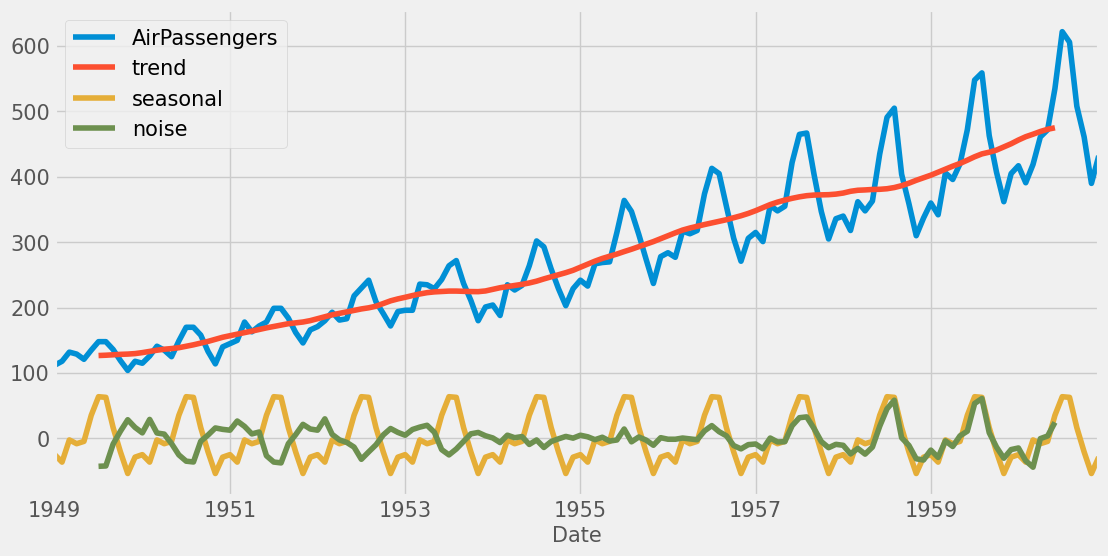

In [ ]:

# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show();

## Chapter 4- Work with Multiple Time Series

In the field of Data Science, it is common to be involved in projects where multiple time series need to be studied simultaneously. In this chapter, we will show you how to plot multiple time series at once, and how to discover and describe relationships between multiple time series.



In [ ]:
import pandas as pd

In [ ]:
# Read in the file content in a DataFrame called meat
meat = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\11. Visualizing Time Series Data in Python\\datasets\\ch4_meat.csv')
print(meat.head());

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  


**Load multiple time series**

Whether it is during personal projects or your day-to-day work as a Data Scientist, it is likely that you will encounter situations that require the analysis and visualization of multiple time series at the same time.

Provided that the data for each time series is stored in distinct columns of a file, the pandas library makes it easy to work with multiple time series. In the following exercises, you will work with a new time series dataset that contains the amount of different types of meat produced in the USA between 1944 and 2012.

In [ ]:
# Review the first five lines of the meat DataFrame
print(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

         date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0  1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1  1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2  1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3  1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4  1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.00

**Visualize multiple time series**

If there are multiple time series in a single DataFrame, you can still use the .plot() method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.

With the pandas library, you can simply leverage the .plot.area() method to produce area charts of the time series data in your DataFrame.

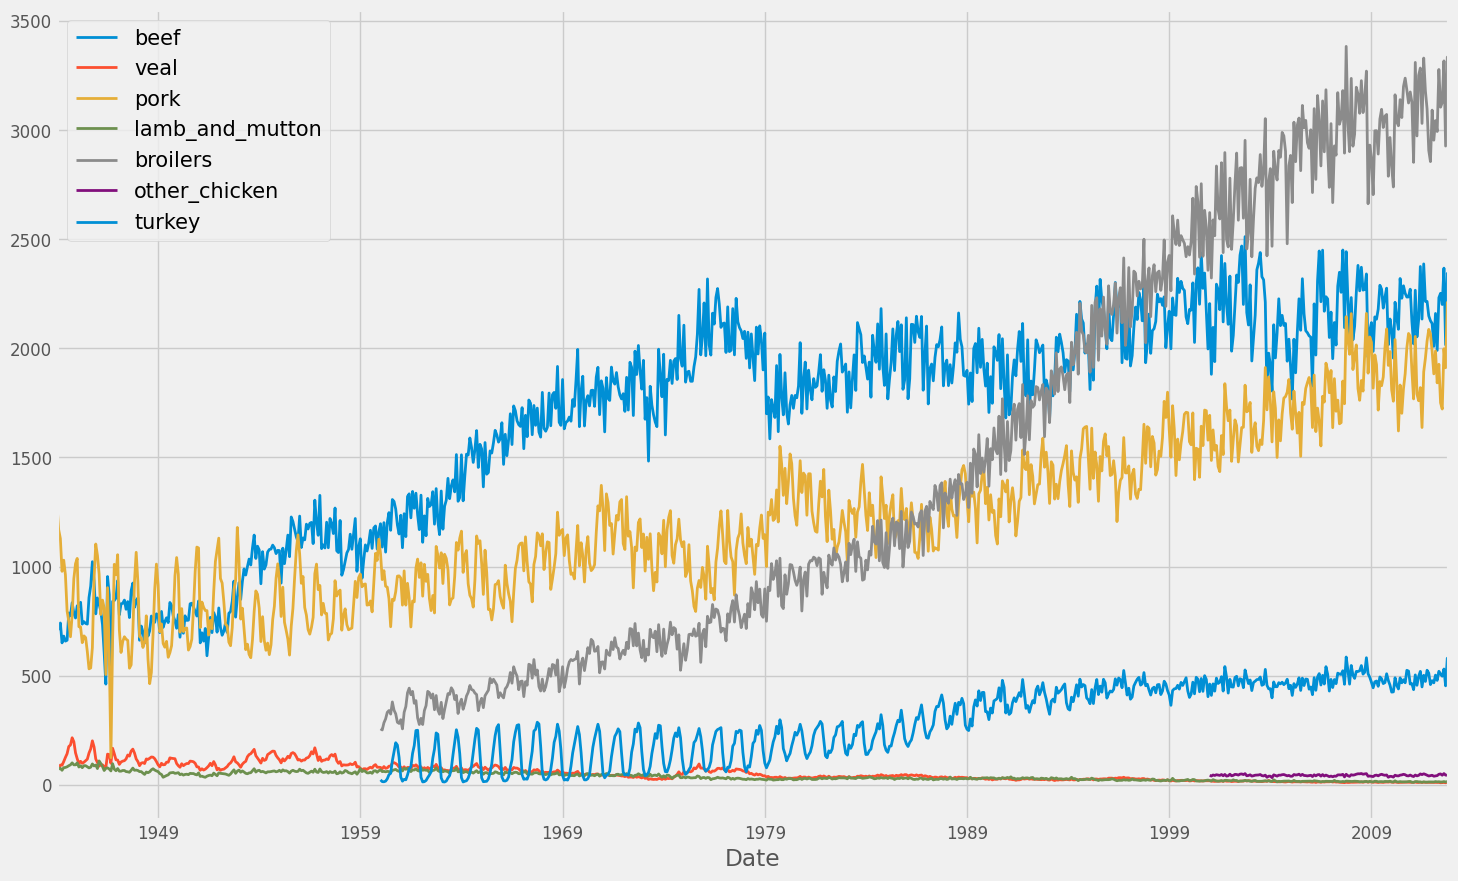

In [ ]:
import matplotlib.pyplot as plt 

ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show();

**Area chart**

It looks the time series in the meat DataFrame have very different growth rates!



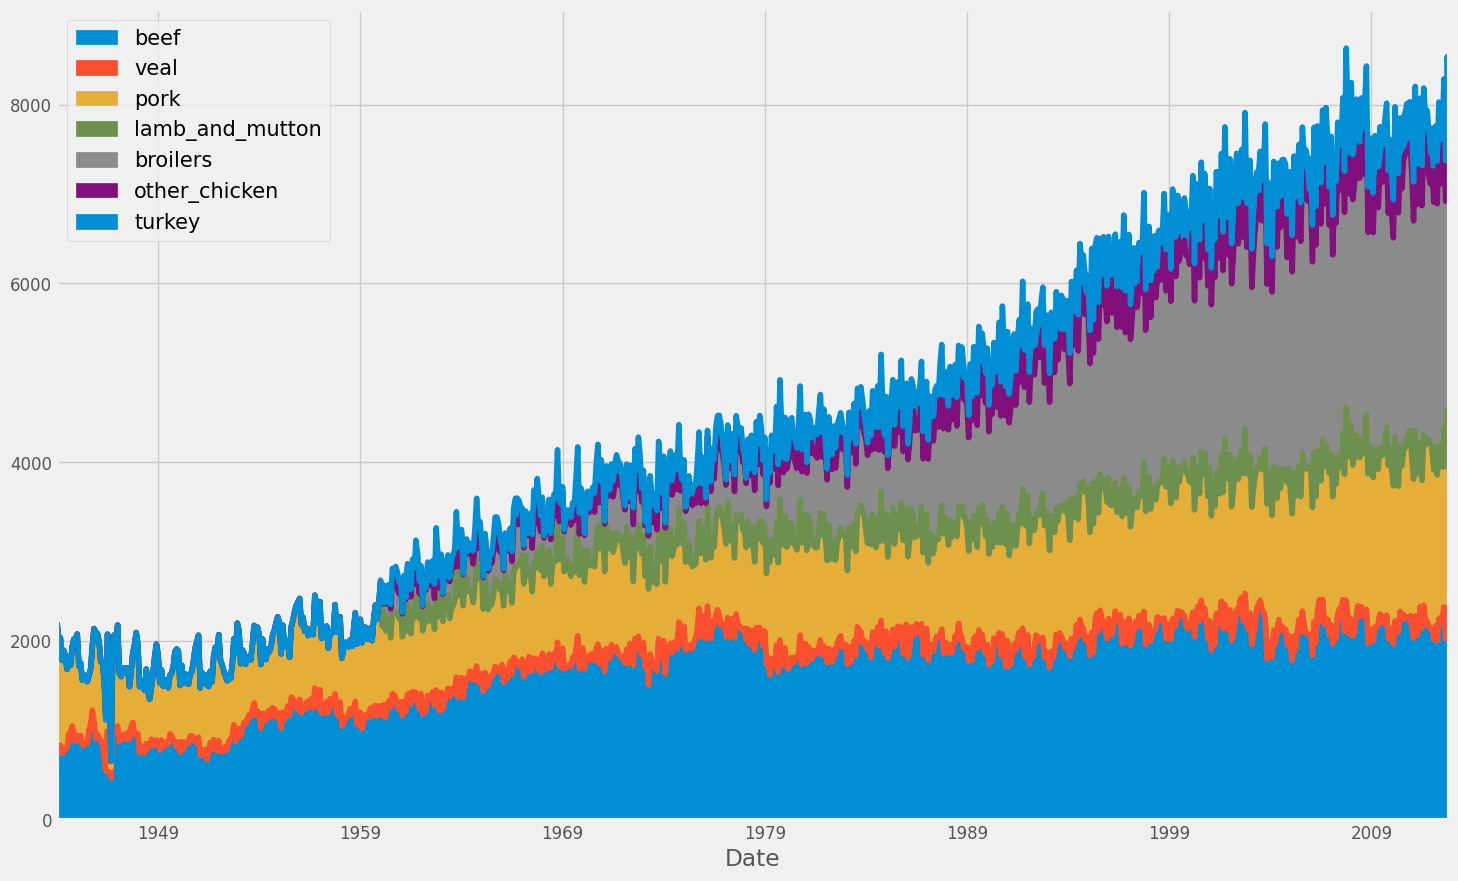

In [ ]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show();

**Statistical summaries of multiple time series**

As seen in the last exercise, the time series in the meat DataFrame display very different behavior over time.

Using the summary statistics presented below, can you identify the time series with the highest mean and maximum value, respectively? Answer: beef has the highest mean and broilers has the maximum value.

In [ ]:
meat.describe()


beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.000000   636.350000   
50%    1853.000000   40.000000  1156.000000        31.000000  1211.300000   
75%    2070.000000   79.000000  1466.000000        55.000000  2426.650000   
max    2512.000000  215.000000  2210.400000       109.000000  3383.800000   

       other_chicken      turkey  
count     143.000000  635.000000  
mean       43.033566  292.814646  
std         3.867141  162.482638  
min        32.300000   12.400000  
25%        40.200000  154.150000  
50%        43.400000  278.300000  
75%        45.650000  449.150000  
max        51.100000  585.100000


**Define the color palette of your plots**

When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the colormap argument to .plot() to automatically assign specific color palettes with varying contrasts. You can either provide a matplotlib colormap as an input to this parameter, or provide one of the default strings that is available in the colormap() function available in matplotlib (all of which are available here).

For example, you can specify the 'viridis' colormap using the following command: df.plot(colormap='viridis').

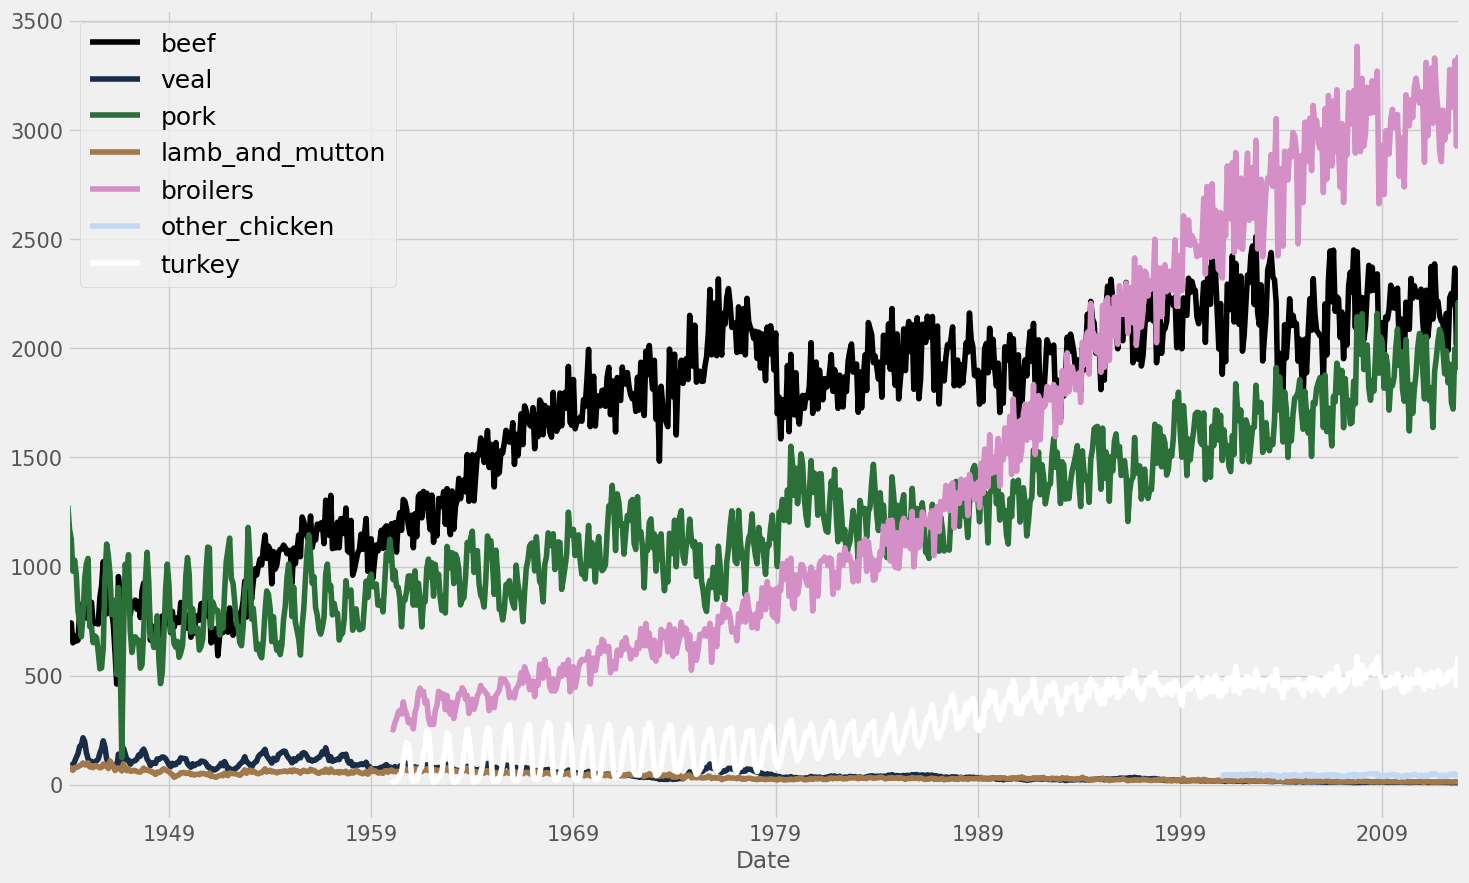

In [ ]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show();

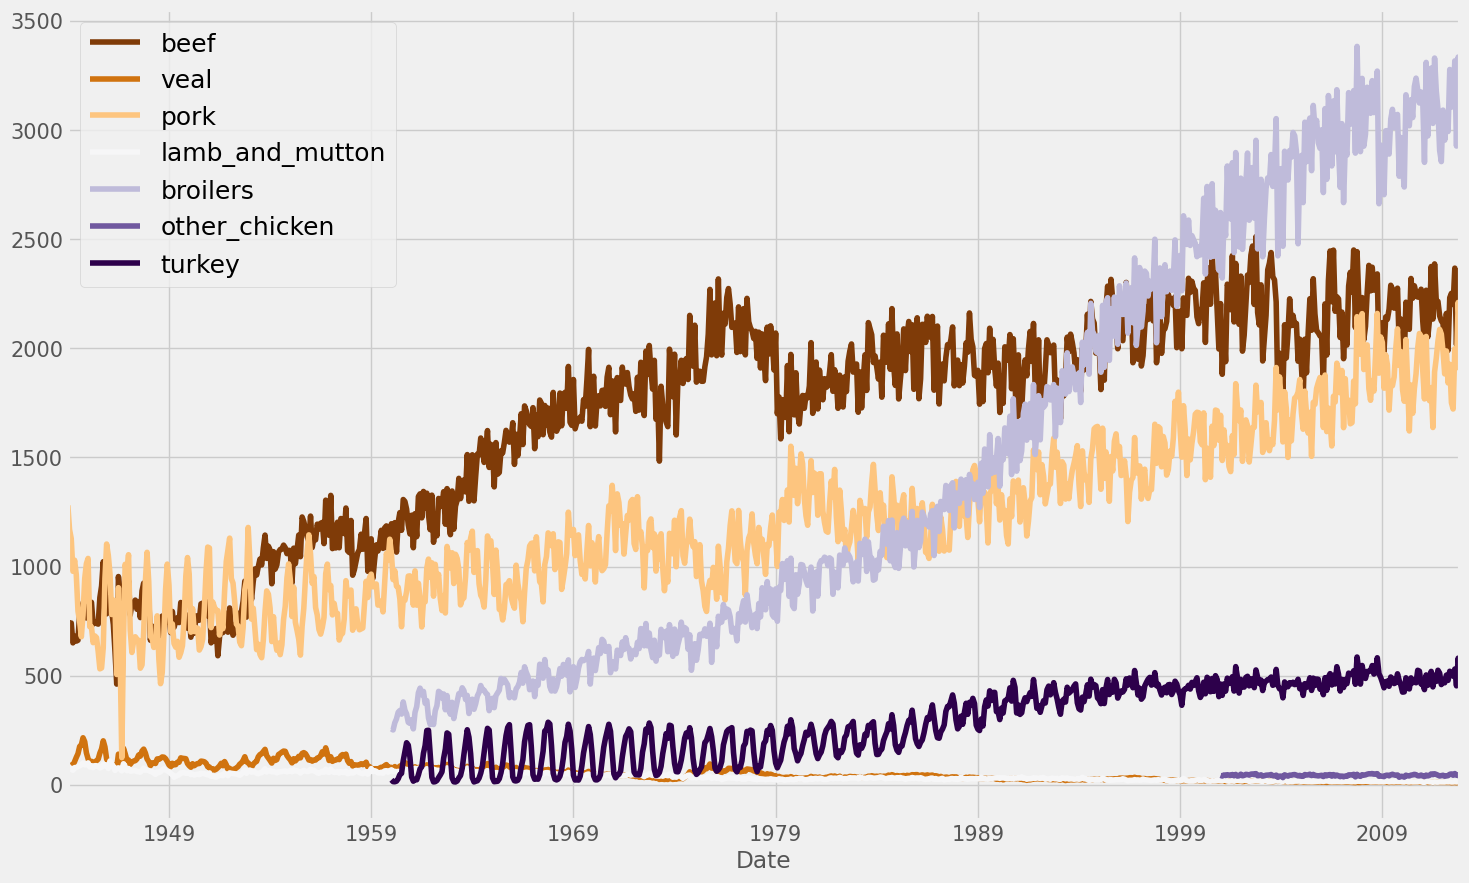

In [ ]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show();

**Add summary statistics to your time series plot**

It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the **table** method:

            # Plot the time series data in the DataFrame
            ax = df.plot()

            # Compute summary statistics of the df DataFrame
            df_summary = df.describe()

            # Add summary table information to the plot
            ax.table(cellText=df_summary.values, 
                    colWidths=[0.3]*len(df.columns), 
                    rowLabels=df_summary.index, 
                    colLabels=df_summary.columns, 
                    loc='top')

In [ ]:
meat_mean = meat.agg(['mean'])
meat_mean

beef       veal         pork  lamb_and_mutton    broilers  \
mean  1683.463362  54.198549  1211.683797        38.360701  1516.58252   

      other_chicken      turkey  
mean      43.033566  292.814646

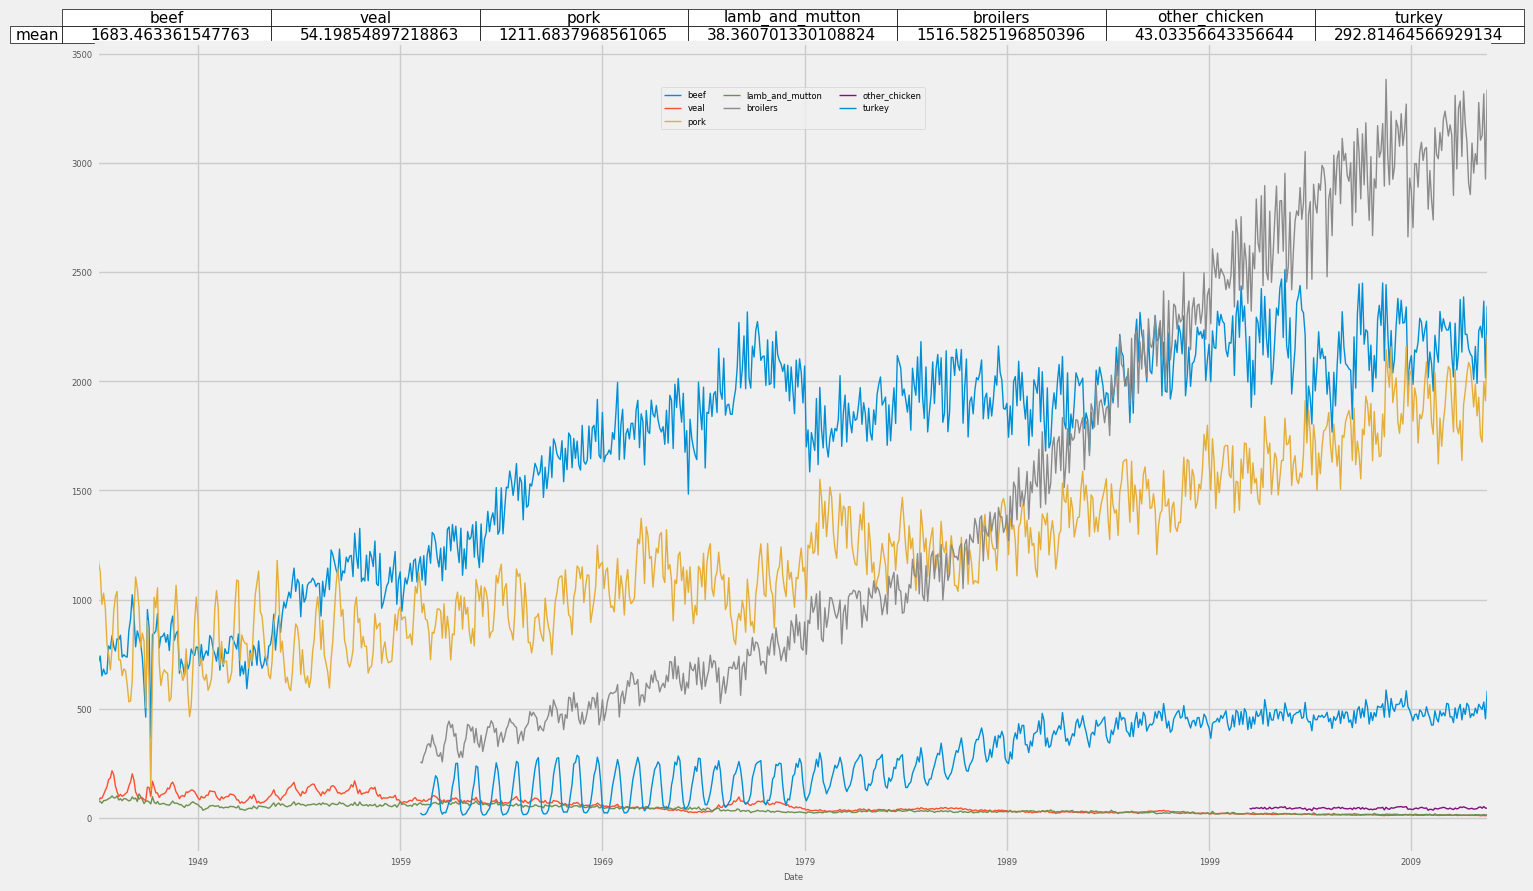

In [ ]:

# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show();

**Plot your time series on individual plots**


It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.


It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the subplots argument to True. In addition, the arguments that can be added are:

    - layout: specifies the number of rows x columns to use.
    - sharex and sharey: specifies whether the x-axis and y-axis values should be shared between your plots.

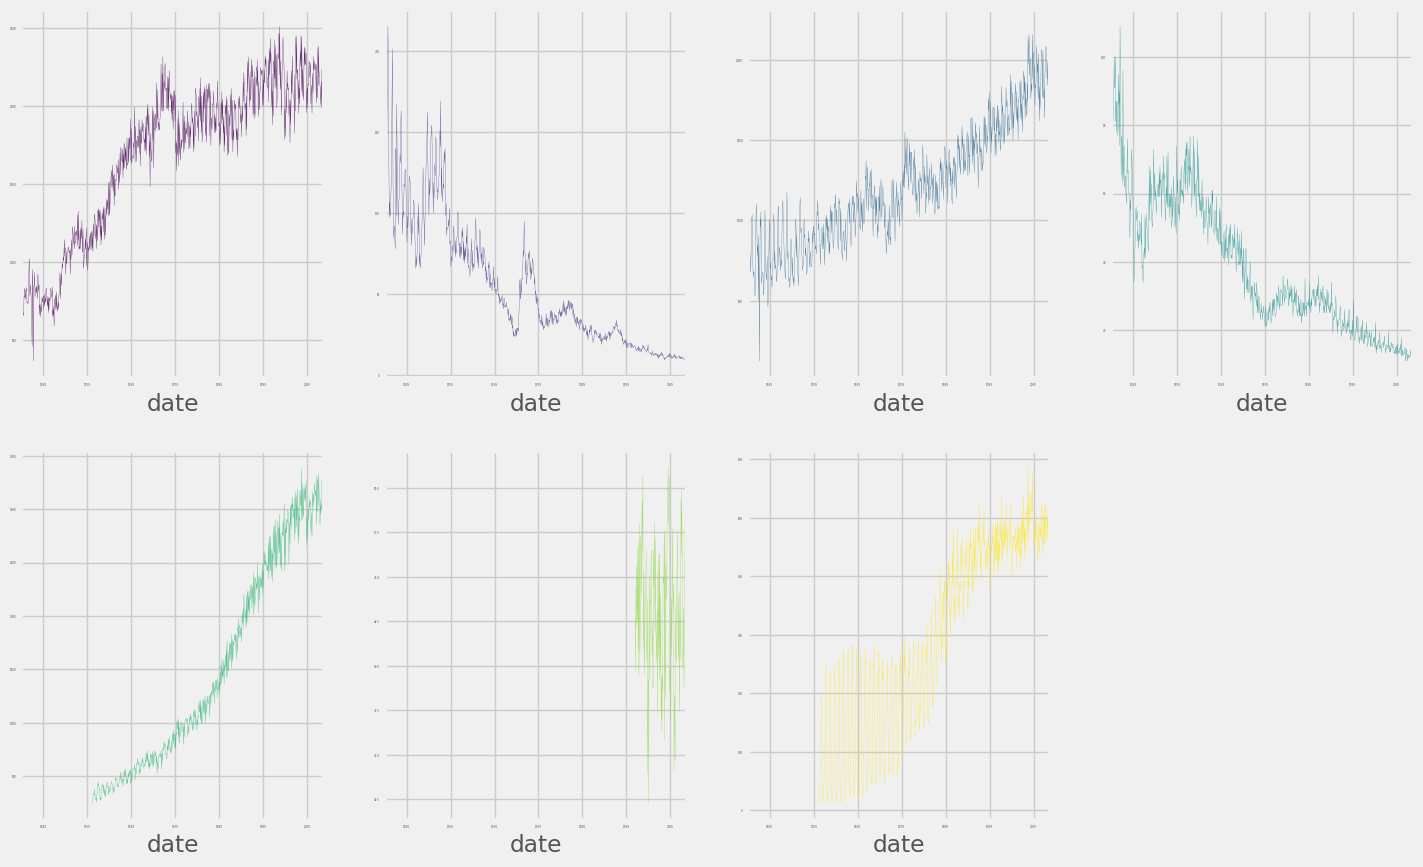

In [ ]:

# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)

plt.show();

**Compute correlations between time series**

In the field of Statistics, the correlation coefficient is a measure used to determine the strength or lack relationship between two variables:

    Pearson's coefficient can be used to compute the correlation coefficient between variables for which the relationship is thought to be linear.
    
    Jendall Tau or Spearman rank can be used to compute the correlation coefficient between variables for which the relationship is thought to be non-linear.

The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.


Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

In [ ]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau
x = [1, 2, 4, 7]
y = [1, 3, 4, 8]
pearsonr(x, y)

C:\Users\yeiso\AppData\Local\Temp\ipykernel_39800\2107548140.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
C:\Users\yeiso\AppData\Local\Temp\ipykernel_39800\2107548140.py:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr
C:\Users\yeiso\AppData\Local\Temp\ipykernel_39800\2107548140.py:3: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import kendalltau


PearsonRResult(statistic=0.9843091327750998, pvalue=0.015690867224900096)

In [ ]:
spearmanr(x, y)


SignificanceResult(statistic=1.0, pvalue=0.0)

In [ ]:
kendalltau(x, y)


SignificanceResult(statistic=1.0, pvalue=0.08333333333333333)

In [ ]:

# Compute the correlation between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

corr_s = meat[['beef', 'pork']].corr(method='spearman')

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000


In [ ]:
type(corr_s)


pandas.core.frame.DataFrame

In [ ]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.828


In [ ]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr('pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835 )

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.809
-0.768
0.835


**Visualize correlation matrices**

The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

    df_corr = df.corr()

    sns.heatmap(df_corr)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0) 
    You can use the .xticks() and .yticks() methods to rotate the axis labels so they don't overlap.

To learn about the arguments to the heatmap() function, refer to this page.

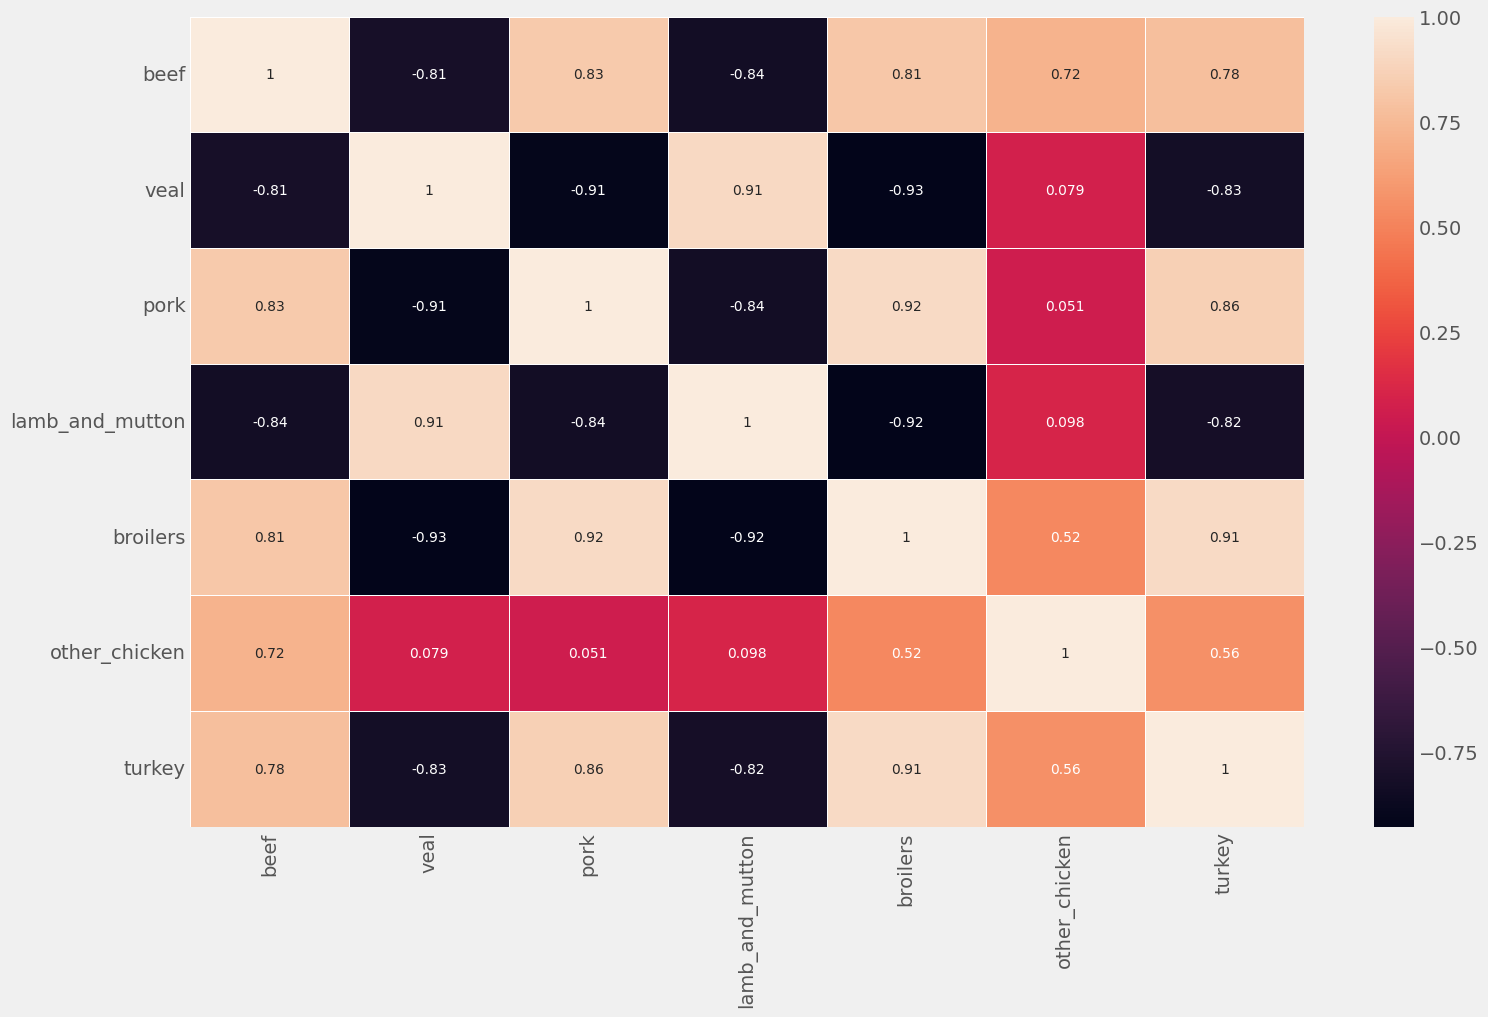

In [ ]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show();

**Clustered heatmaps**

Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:

    df_corr = df.corr()

    fig = sns.clustermap(df_corr)

    plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

    plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

To prevent overlapping of axis labels, you can reference the Axes from the underlying fig object and specify the rotation. You can learn about the arguments to the clustermap() function here (https://seaborn.pydata.org/generated/seaborn.clustermap.html)


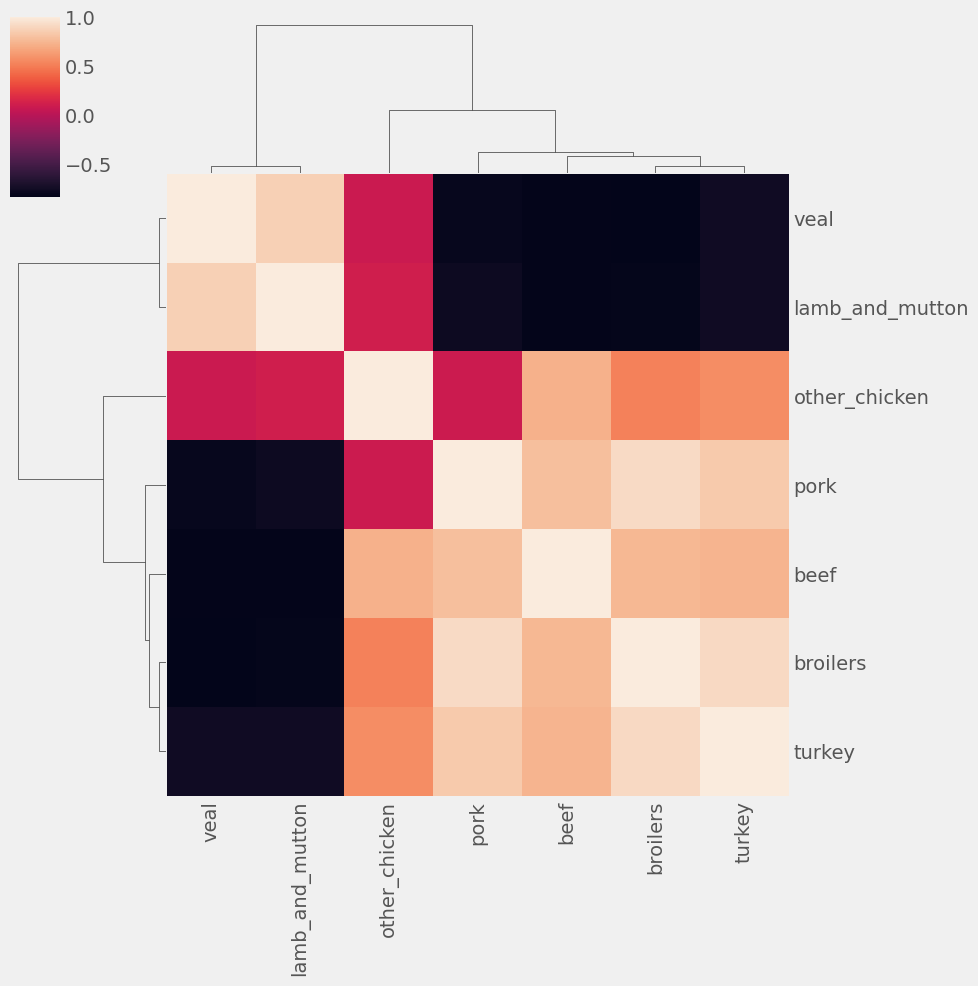

In [ ]:

# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show();

**Explore the Jobs dataset**

In this exercise, you will explore the new jobs DataFrame, which contains the unemployment rate of different industries in the USA during the years of 2000-2010. As you will see, the dataset contains time series for 16 industries and across 122 timepoints (one per month for 10 years). In general, the typical workflow of a Data Science project will involve data cleaning and exploration, so we will begin by reading in the data and checking for missing values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [ ]:
jobs = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\11. Visualizing Time Series Data in Python\\datasets\\ch5_employment.csv')

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each columns
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

**Describe time series data with boxplots**

You should always explore the distribution of the variables, and because you are working with time series, you will explore their properties using boxplots and numerical summaries. As a reminder, you can plot data in a DataFrame as boxplots with the command:

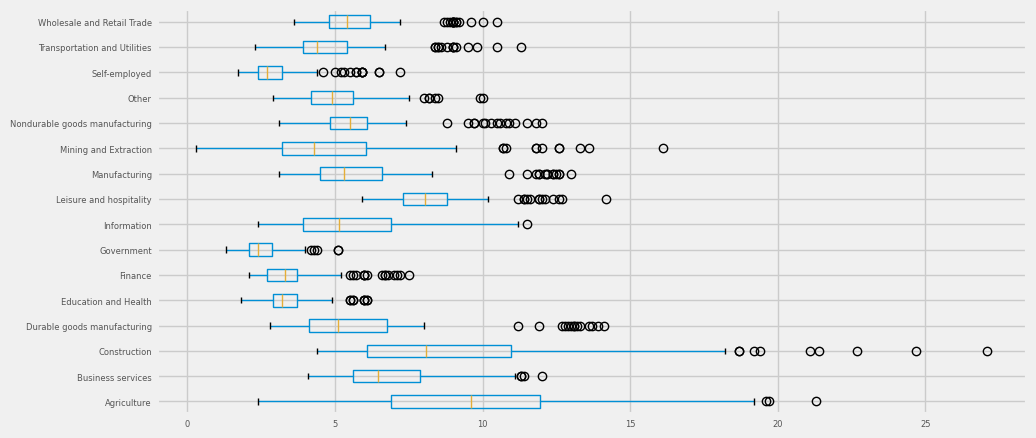

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [ ]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print(jobs.mean().idxmax())

# Print the name of the time series with the highest variability
print(jobs.std().idxmax())


In [ ]:
#you can also use 'describe'
print(jobs.describe)

<bound method NDFrame.describe of             Agriculture  Business services  Construction  \
datestamp                                                  
2000-01-01         10.3                5.7           9.7   
2000-02-01         11.5                5.2          10.6   
2000-03-01         10.4                5.4           8.7   
2000-04-01          8.9                4.5           5.8   
2000-05-01          5.1                4.7           5.0   
...                 ...                ...           ...   
2009-10-01         11.8               10.3          18.7   
2009-11-01         12.6               10.6          19.4   
2009-12-01         19.7               10.3          22.7   
2010-01-01         21.3               11.1          24.7   
2010-02-01         18.8               12.0          27.1   

            Durable goods manufacturing  Education and Health  Finance  \
datestamp                                                                
2000-01-01                          3

**Beyond summary statistics**

Plot all the time series in your dataset
The jobs DataFrame contains 16 time series representing the unemployment rate of various industries between 2001 and 2010. This may seem like a large amount of time series to visualize at the same time, but Chapter 4 introduced you to facetted plots. In this exercise, you will explore some of the time series in the jobs DataFrame and look to extract some meaningful information from these plots.

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


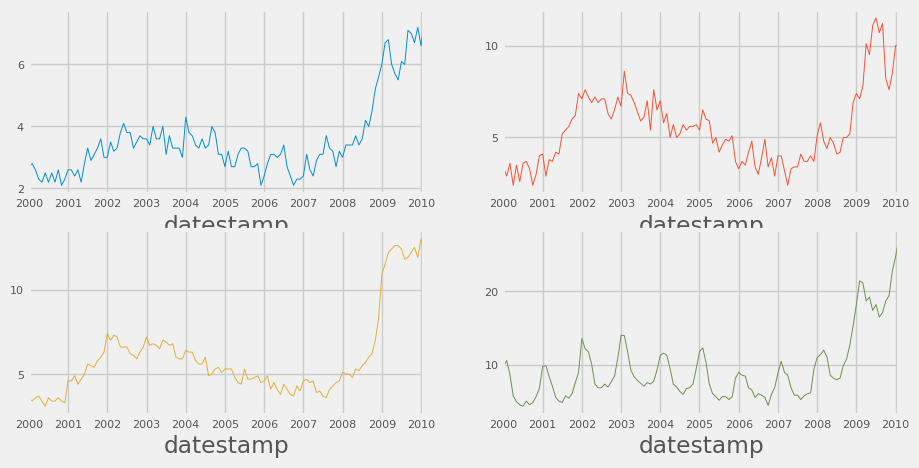

In [ ]:
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=8,
                     legend=False);

Annotate significant events in time series data

When plotting the Finance, Information, Manufacturing and Construction time series of the jobs DataFrame, you observed a distinct increase in unemployment rates during 2001 and 2008. In general, time series plots can be made even more informative if you include additional annotations that emphasize specific observations or events. This allows you to quickly highlight parts of the graph to viewers, and can help infer what may have caused a specific event.

Recall that you have already set the datestamp column as the index of the jobs DataFrame, so you are prepared to directly annotate your plots with vertical or horizontal lines.

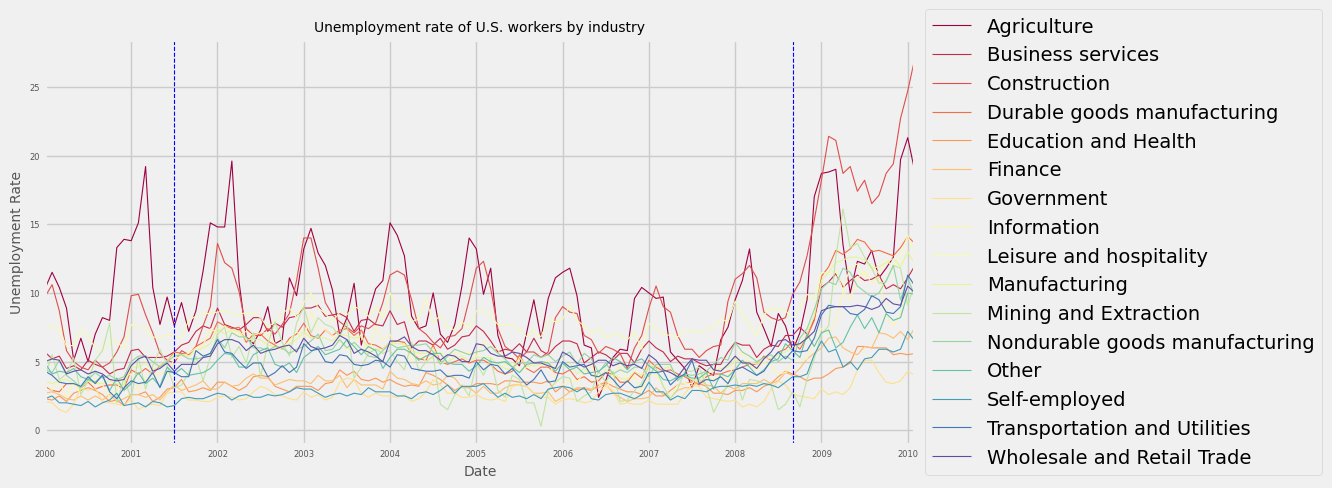

In [ ]:
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8);

# Set labels and legend
ax.set_xlabel('Date', fontsize=10);
ax.set_ylabel('Unemployment Rate', fontsize=10);
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8);
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8);

**Plot monthly and yearly trends**

Like we saw in Chapter 2, when the index of a DataFrame is of the datetime type, it is possible to directly extract the day, month or year of each date in the index. As a reminder, you can extract the year of each date in the index using the .index.year attribute. You can then use the .groupby() and .mean() methods to compute the mean annual value of each time series in your DataFrame:

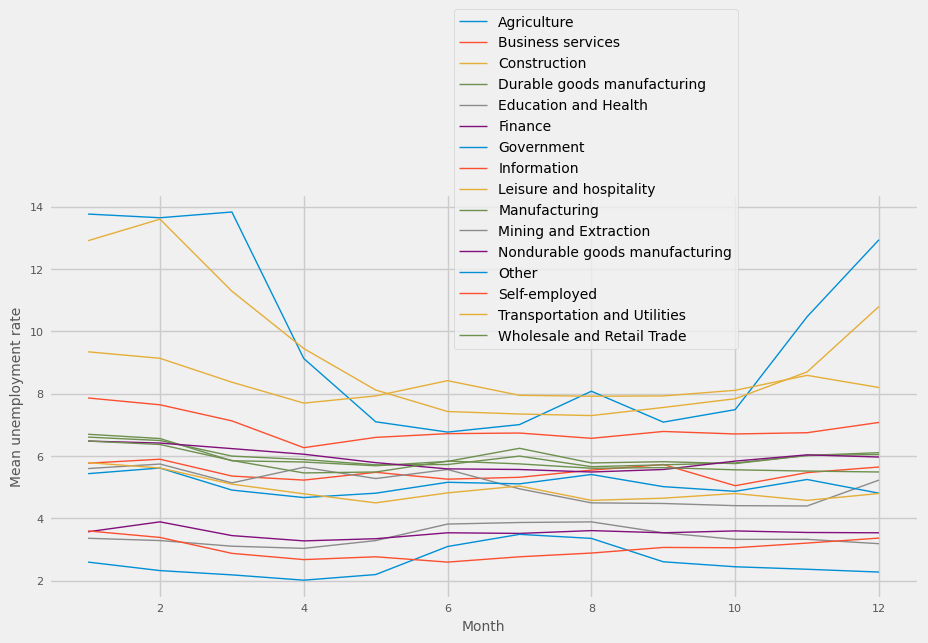

In [ ]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=8, linewidth=1);

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

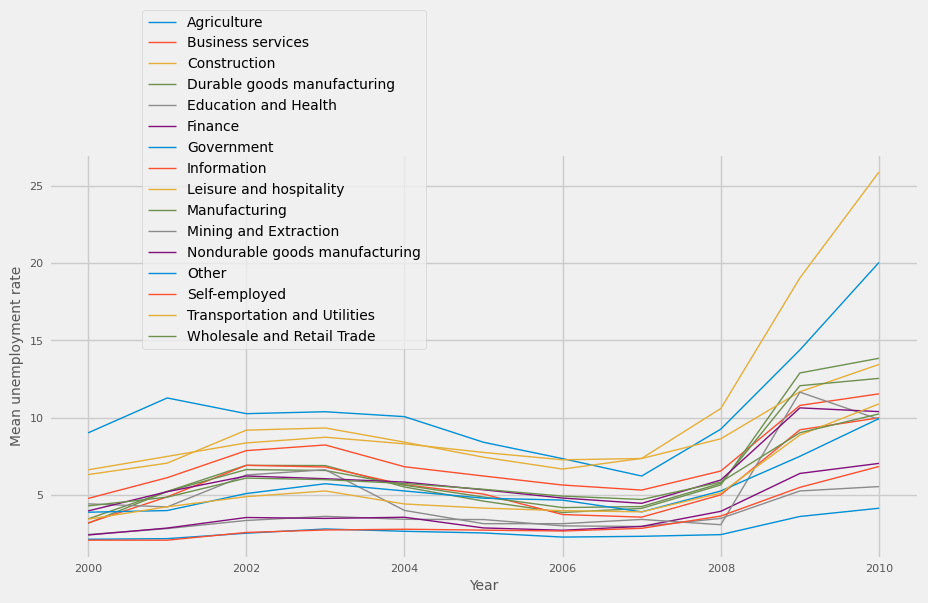

In [ ]:
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=8, linewidth=1);

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean unemployment rate', fontsize=10);
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10);

**Decompose time series data**

Apply time series decomposition to your dataset
You will now perform time series decomposition on multiple time series. You can achieve this by leveraging the Python dictionary to store the results of each time series decomposition.

In this exercise, you will initialize an empty dictionary with a set of curly braces, {}, use a for loop to iterate through the columns of the DataFrame and apply time series decomposition to each time series. After each time series decomposition, you place the results in the dictionary by using the command my_dict[key] = value, where my_dict is your dictionary, key is the name of the column/time series, and value is the decomposition object of that time series.

In [ ]:
import statsmodels.api as sm

# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

**Visualize the seasonality of multiple time series**

You will now extract the seasonality component of jobs_decomp to visualize the seasonality in these time series. Note that before plotting, you will have to convert the dictionary of seasonality components into a DataFrame using the pd.DataFrame.from_dict() function.

In [ ]:
jobs_seasonal = {}


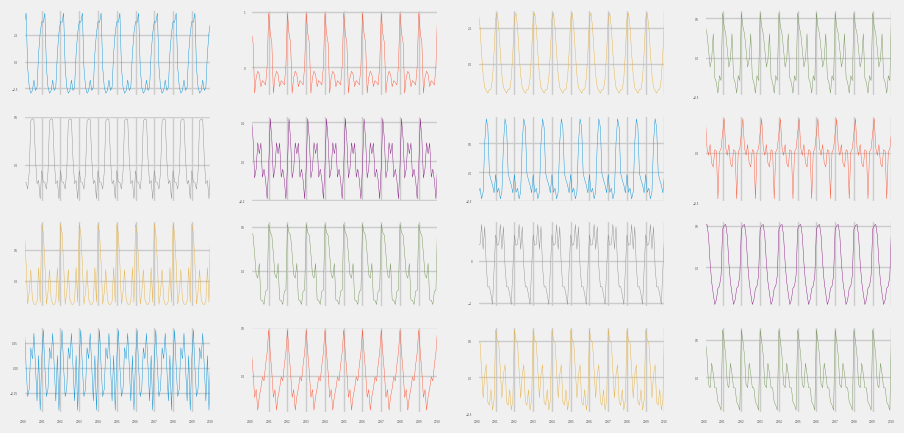

In [ ]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False);

**Compute correlations between time series**

Correlations between multiple time series
In the previous exercise, you extracted the seasonal component of each time series in the jobs DataFrame and stored those results in new DataFrame called seasonality_df. In the context of jobs data, it can be interesting to compare seasonality behavior, as this may help uncover which job industries are the most similar or the most different.

This can be achieved by using the seasonality_df DataFrame and computing the correlation between each time series in the dataset. In this exercise, you will leverage what you have learned in Chapter 4 to compute and create a clustermap visualization of the correlations between time series in the seasonality_df DataFrame.

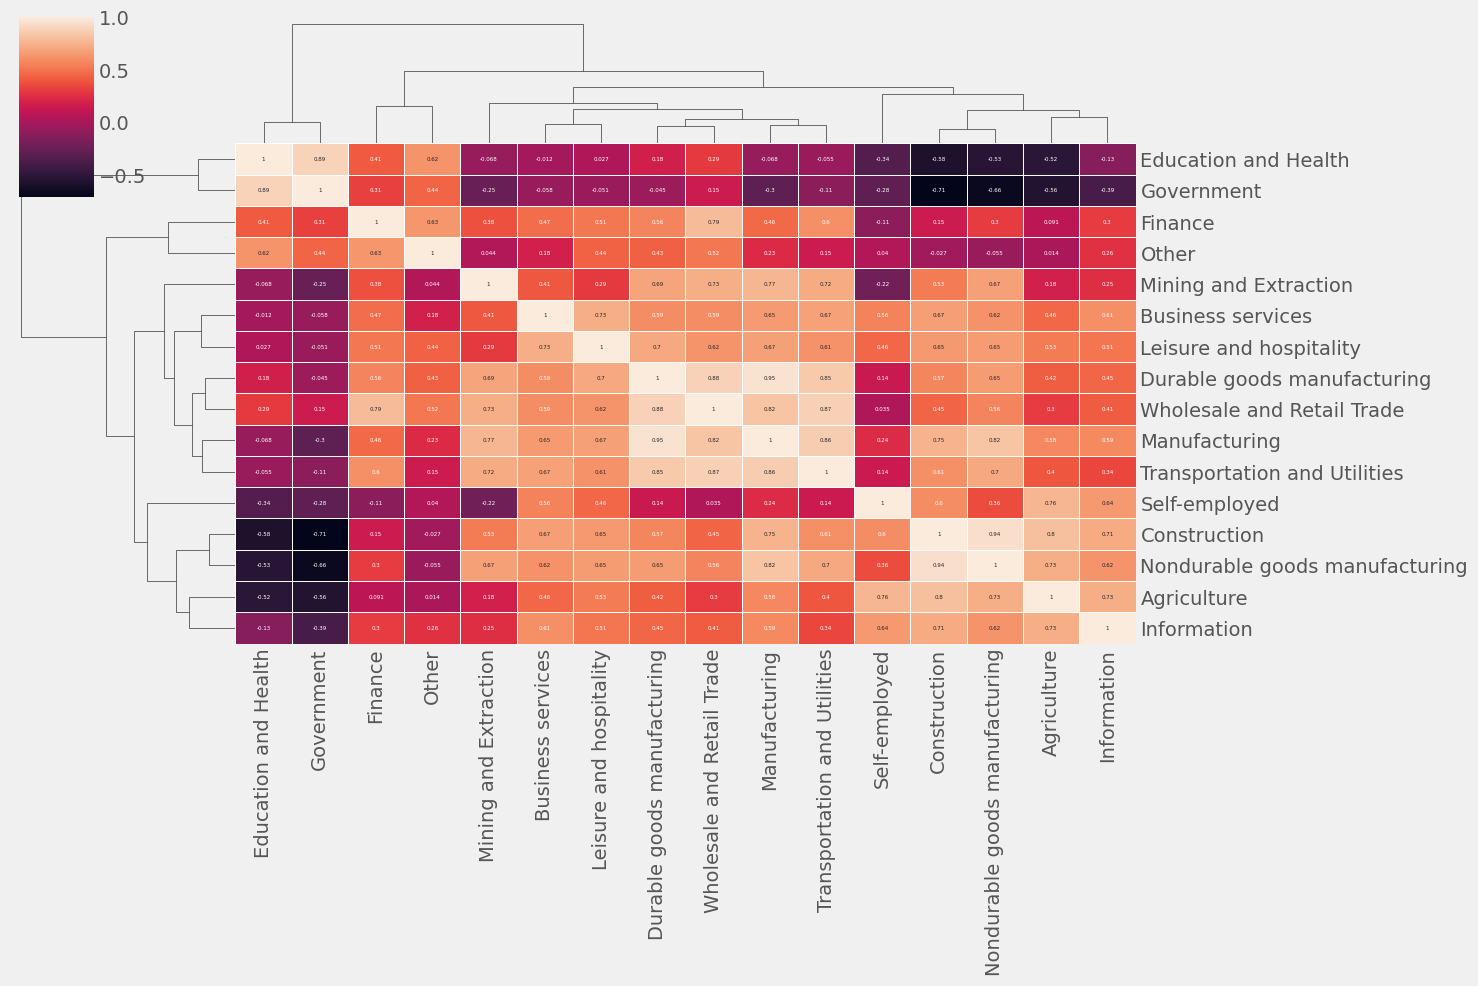

correlation calculated =  0.8887968296115875
correlation typped =  0.89


In [ ]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, 
                     annot=True, 
                     annot_kws={"size": 4}, 
                     linewidths=.4, 
                     figsize=(15, 10));
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);

#save the image of the clustermap of the seasonality_corr correlation matrix
plt.savefig('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\11. Visualizing Time Series Data in Python\\images\\jobs_clustermap.png')

plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print("correlation calculated = ", seasonality_corr.loc['Government', 'Education and Health'])

# Print the correlation between the seasonalities of the Government and Education & Health industries
print("correlation typped = ", 0.89)
